In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge, RidgeCV
# from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 1 Effet de la régularisation ridge
Ce premier exercice vise à analyser l’effet de la régularisation ridge sur les paramètres du modèle linéaire résultant. Pour cela, nous allons générer un jeu de données synthétique et entraîner un modèle de régression linéaire régularisée pour différentes valeurs de λ.

**1. Générez un jeu de données synthétique avec la fonction make_regression de Scikit-learn :**

In [74]:
X, y, w = make_regression(n_samples =100, n_features =10, n_informative =8,
coef=True , random_state =42)

**2. À quoi correspondent les valeurs de w retournées par la fonction ? Observez ces valeurs et donnez votre analyse**

Sao os coeficientes do modelo linear. Podemos ver que o MSE fornecido por estes coeficientes sao praticamente 0.

In [75]:
y_coef = X @ w

MSE = np.mean((y_coef-y)**2)

print(MSE)

2.5262481628797683e-28


**3. Créez un vecteur lambdas qui contient 100 valeurs, distribuées uniformément sur une échelle logarithmique entre $10^(−3)$ et $10^4$**

In [76]:
lambdas = np.logspace(-3, 4, num=100)

**4. En utilisant la classe Ridge, entraînez un modèle de régression linéaire régularisée pour chaque valeur de λ de lambdas, sur la totalité de données**

In [84]:
ridges = []
# coefs = []
for i in range(0,len(lambdas)):
    ridge = Ridge(alpha=lambdas[i])
    ridge.fit(X, y)
    ridges.append(ridge)
    # coefs.append(ridge.coef_)

**5. Pour chacun de ces modèles :**
- **stockez toutes les valeurs de paramètres obtenues dans un tableau de taille 100 × 10**
- **calculez l’erreur absolue moyenne des paramètres par rapport à w**

In [85]:
coefs = []
errors_coefs = []
for r in ridges:
    coefs.append(r.coef_)
    errors_coefs.append(mean_absolute_error(r.coef_ , w))

**6. Affichez l’évolution des valeurs des paramètres en fonction de λ**

/tmp/ipykernel_5981/1430615436.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


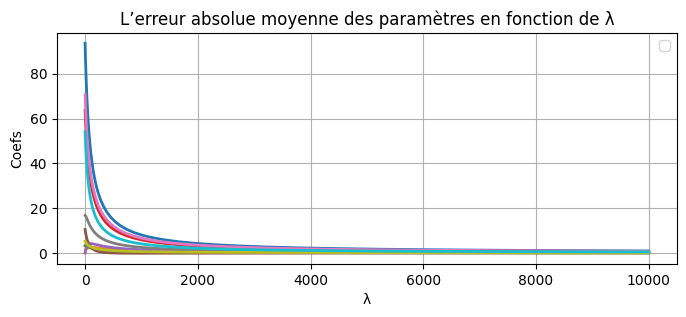

In [87]:
plt.figure(figsize=(8, 3))
plt.plot(lambdas, coefs, linewidth=2)
plt.title("L’erreur absolue moyenne des paramètres en fonction de λ")
plt.xlabel("λ")
plt.ylabel("Coefs")
plt.legend()
plt.grid(True)
plt.show()

**7. Affichez l’évolution de l’erreur absolue moyenne des paramètres en fonction de λ**

/tmp/ipykernel_5981/2765098935.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


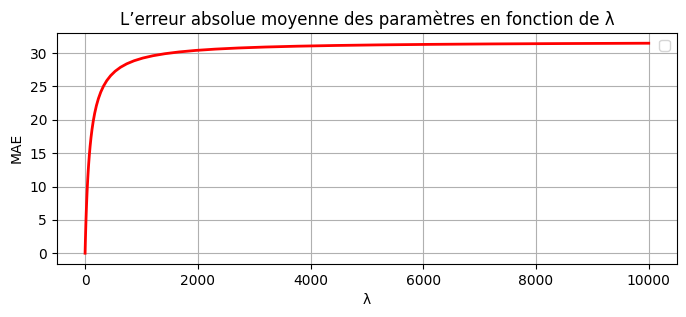

In [88]:
plt.figure(figsize=(8, 3))
plt.plot(lambdas, errors_coefs, color="red", linewidth=2)
plt.title("L’erreur absolue moyenne des paramètres en fonction de λ")
plt.xlabel("λ")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.show()

**8. Commentez les résultats obtenus**

Podmos ver que os valores menores de lambda fornecem coeficientes maiores, isso acontece, pois quando lambda é pequeno, a correçao de ridge é feita com ceficientes pequenos que nao influenciam muito nos coeficientes originais.

Podemos ver que estes valores pequenos foram os que forneceram o menor erro, ou seja, eles ...

### 2 Impact de la normalisation des données
Ce deuxième exercice vise à analyser l’impact de la normalisation des données sur les performances de la régression linéaire régularisée. Nous allons utiliser la base de données real_estate.csv disponible sur UniversiTICE, qui vise à prédire le prix au mètre carré de biens immobiliers en fonction de 6 caractéristiques qui décrivent ces biens.

**1. Chargez la base de données :**

In [89]:
df = pd.read_csv("real_estate.csv", delimiter=",")
df.drop(columns =["No"], inplace=True)
y = df["Y house price of unit area"]
X = df.drop(columns =["Y house price of unit area"])
df.head (10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


**2. Séparez les données pour former un jeu d’entraînement avec une moitié des données et un jeu de test avec l’autre moitié**

In [90]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42)

**3. Entraînez un modèle de régression ridge sur les données d’entraînement, en sélectionnant la valeur de λ par validation croisée à l’aide de la classe RidgeCV de Scikit-learn**

In [91]:
def Train_Pred_RidgeCV(x_train, y_train, x_test, lambdas):
    ridge = RidgeCV(alphas=lambdas).fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    print(f"Best lambda is {ridge.alpha_}")
    return y_pred

In [92]:
lambdas = np.logspace(-3, 4, num=100)
y_pred = Train_Pred_RidgeCV(x_train, y_train, x_test, lambdas)

Best lambda is 0.0036783797718286343


**4. Calculez l’erreur quadratique moyenne (MSE) et le coefficient de détermination R2 du modèle obtenu, sur les données de test**

In [93]:
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

64.83186483867972
5.877592730751058
0.5915368945743638


**5. Normalisez les données avec la classe StandardScaler**

In [94]:
sc = StandardScaler(with_mean=True , with_std=True)
sc = sc.fit(x_train)
Xa_n = sc.transform(x_train)
Xt_n = sc.transform(x_test)

**6. Entraînez un modèle de régression ridge sur les données normalisées, avec la même procédure de validation croisée**

In [95]:
y_pred_n = Train_Pred_RidgeCV(Xa_n, y_train, Xt_n, lambdas)

Best lambda is 12.61856883066021


**7. Calculez l’erreur quadratique moyenne et le coefficient de détermination R2 et comparez les résultats obtenus avec ceux obtenus sans normalisation**

In [96]:
print(mean_squared_error(y_test, y_pred_n))
print(mean_absolute_error(y_test, y_pred_n))
print(r2_score(y_test, y_pred_n))

63.893167808003625
5.853466637403478
0.5974510095725649


**8. Commentez les résultats obtenus**

Se nao tocar o y, pode haver maior diferença nos resultados. Sera que deve normalisar o y?

### 3 Régression LASSO
Scikit-learn fournit des outils spécifiques pour régler le paramètre de régularisation des modèles LASSO et Elastic-Net. Dans cet exercice, nous allons nous appuyer sur ces outils pour étudier les effets des régularisations `1 et `2 sur les paramètres du modèle. Nous proposons d’utiliser la base de données baseball_processed.csv disponible sur UniversiTICE. Cette base contient des informations sur des joueurs de baseball, et l’objectif est de prédire le salaire des joueurs en fonction de ces caractéristiques.

**1. Chargez la base de données :**

In [99]:
df = pd.read_csv("baseball_processed.csv", delimiter=",")
print(df.describe ())

         lnSalary      BatAVG      OnBase        Runs        Hits     Doubles  \
count  337.000000  337.000000  337.000000  337.000000  337.000000  337.000000   
mean     6.535420    0.257825    0.323973   46.697329   92.833828   16.673591   
std      1.176543    0.039546    0.047132   29.020166   51.896322   10.452001   
min      4.691348    0.063000    0.063000    0.000000    1.000000    0.000000   
25%      5.438079    0.238000    0.297000   22.000000   51.000000    9.000000   
50%      6.606650    0.260000    0.323000   41.000000   91.000000   15.000000   
75%      7.673223    0.281000    0.354000   69.000000  136.000000   23.000000   
max      8.716044    0.457000    0.486000  133.000000  216.000000   49.000000   

          Triples    HomeRuns         RBI       Walks  StrikeOuts  \
count  337.000000  337.000000  337.000000  337.000000  337.000000   
mean     2.338279    9.097923   44.020772   35.017804   56.706231   
std      2.543336    9.289934   29.559406   24.842474   33.8287

**2. Séparez les données pour former un jeu d’entraînement avec une moitié des données et un jeu de test avec l’autre moitié**

In [100]:
df.head()

,lnSalary,BatAVG,OnBase,Runs,Hits,Doubles,Triples,HomeRuns,RBI,Walks,StrikeOuts,StolenBases,Errors,FreeAgElig,FreeAge91,ArbElig,Arb91
0,8.101678,0.272,0.302,69,153,21,4,31,104,22,80,4,3,1,0,0,0
1,7.863267,0.269,0.335,58,111,17,2,18,66,39,69,0,3,1,1,0,0
2,7.824046,0.249,0.337,54,115,15,1,17,73,63,116,6,5,1,0,0,0
3,7.813996,0.260,0.292,59,128,22,7,12,50,23,64,21,21,0,0,1,0
4,7.746301,0.273,0.346,87,169,28,5,8,58,70,53,3,8,0,0,1,0


In [101]:
y = df["lnSalary"]
X = df.drop(columns =["lnSalary"])
df.head (10)

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42)